In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
turbina = pd.read_csv('T1.csv')
turbina.columns = ['Data/hora', 'Potencia(kW)', 'Velocidade_do_vento(m/s)', 'Curva_Teórica(KWh)','Direção_do_vento(°)']
del turbina['Direção_do_vento(°)']
display(turbina)
turbina['Data/hora'] = pd.to_datetime(turbina['Data/hora'])

,Data/hora,Potencia(kW),Velocidade_do_vento(m/s),Curva_Teórica(KWh)
0,01 01 2018 00:00,380.047791,5.311336,416.328908
1,01 01 2018 00:10,453.769196,5.672167,519.917511
2,01 01 2018 00:20,306.376587,5.216037,390.900016
3,01 01 2018 00:30,419.645905,5.659674,516.127569
4,01 01 2018 00:40,380.650696,5.577941,491.702972
...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503


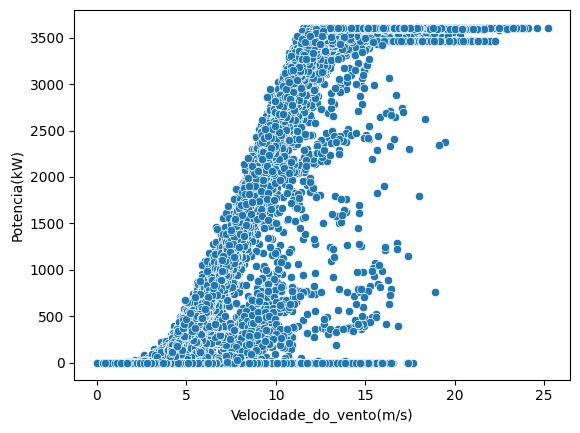

In [74]:
graf1=sns.scatterplot(data=turbina, x='Velocidade_do_vento(m/s)', y='Potencia(kW)')

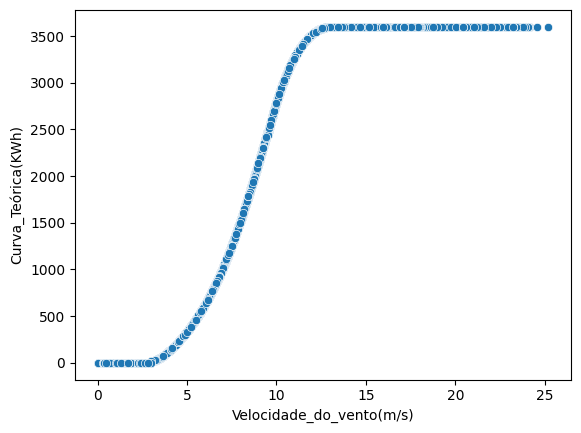

In [75]:
graf2=sns.scatterplot(data=turbina, x='Velocidade_do_vento(m/s)', y='Curva_Teórica(KWh)')

In [76]:
potencia_real = turbina['Potencia(kW)'].tolist()
potencia_teorica = turbina['Curva_Teórica(KWh)'].tolist()
potencia_maxima = []
potencia_minima = []
dentro_do_limite = []

for potencia in potencia_teorica:
    potencia_maxima.append(potencia*1.05)
    potencia_minima.append(potencia*0.95)
print(len(potencia_maxima), len(potencia_minima),len(potencia_teorica))

for p, potencia in enumerate(potencia_real):
    if potencia>=potencia_minima[p] and potencia_maxima<=[p]:
        dentro_do_limite.append('Dentro')
    elif potencia == 0:
        dentro_do_limite.append('Zero')
    else:
        dentro_do_limite.append('Fora')

#print(len(pot_max),len(pot_min))

print(dentro_do_limite.count('Dentro')/len(dentro_do_limite))

50530 50530 50530
0.42050267168019


In [77]:
turbina['DentroLimite'] = dentro_do_limite
display(turbina)

,Data/hora,Potencia(kW),Velocidade_do_vento(m/s),Curva_Teórica(KWh),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Dentro
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Dentro
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


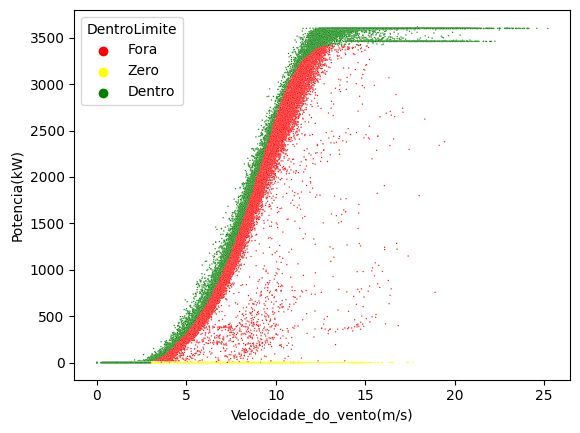

In [78]:
cores = {'Dentro':'green','Fora':'red','Zero':'yellow'}
graf3=sns.scatterplot(data=turbina, x='Velocidade_do_vento(m/s)', y='Potencia(kW)', hue='DentroLimite',s=1, palette=cores)